In [943]:
import pandas as pd
import matplotlib.pyplot as plt

In [944]:
df = pd.read_csv("../data/processed/master_file.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6337 entries, 0 to 6336
Data columns (total 84 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        6337 non-null   object 
 1   EPU_CAN     5535 non-null   float64
 2   IP_CAN      5507 non-null   float64
 3   10YS_CAN    1950 non-null   float64
 4   INF_CAN     474 non-null    float64
 5   EX_CAN      1904 non-null   float64
 6   IM_CAN      1904 non-null   float64
 7   RECESS_CAN  5157 non-null   float64
 8   GDP_CAN     1926 non-null   float64
 9   GDPC_CAN    194 non-null    float64
 10  GBR_CAN     3895 non-null   float64
 11  EXR_CAN     5713 non-null   float64
 12  CCI_CAN     3707 non-null   float64
 13  UNEMP_CAN   443 non-null    float64
 14  EPU_GER     5439 non-null   float64
 15  IP_GER      454 non-null    float64
 16  INF_GER     474 non-null    float64
 17  UNEMP_GER   834 non-null    float64
 18  IM_GER      1806 non-null   float64
 19  EX_GER      1717 non-null  

In [945]:
df.columns

Index(['date', 'EPU_CAN', 'IP_CAN', '10YS_CAN', 'INF_CAN', 'EX_CAN', 'IM_CAN',
       'RECESS_CAN', 'GDP_CAN', 'GDPC_CAN', 'GBR_CAN', 'EXR_CAN', 'CCI_CAN',
       'UNEMP_CAN', 'EPU_GER', 'IP_GER', 'INF_GER', 'UNEMP_GER', 'IM_GER',
       'EX_GER', 'RECESS_GER', 'GDP_GER', 'GDPC_GER', '10YS_GER', 'EXR_GER',
       'EPU_JAP', 'IP_JAP', 'INF_JAP', 'UNEMP_JAP', 'EX_JAP', 'RECESS_JAP',
       'GDP_JAP', 'GDPC_JAP', '10YS_JAP', 'IM_JAP', 'EXR_JAP', 'EPU_USA',
       'IP_USA', 'YS_USA', 'INF_USA', 'UNEMP_USA', 'EX_USA', 'IM_USA',
       'BOPGSTB', 'RECESS_USA', 'GDP_USA', 'GDPC_USA', 'CCI_USA', 'EPU_MEX',
       'IP_MEX', 'INF_MEX', 'GDP_MEX', '2YS_MEX', '1OYS_MEX', 'EXR_MEX',
       'UNEMP_MEX', 'GDPC_MEX', 'EX_MEX', 'IM_MEX', 'EX_MEX.1', 'RECESS_MEX',
       'UNEMP_MEX+', 'EPU_CHI', 'IP_CHI', 'INF_CHI', 'IM_CHI', 'EX_CHI',
       'TB_CHI', 'RECESS_CHI', '10YS_CHI', 'EXR_CHI', 'UNEMP_CHI', 'GDPC_CHI',
       'GDP_CHI', 'Unnamed: 0', 'CCI_CHI', 'CCI_GER', 'CCI_JAP', 'CCI_MEX',
       'YS_CAN'

### Drop residual columns

In [946]:
df = df.drop(columns=["Unnamed: 0", "10YS_CHI", "10YS_JAP", '2YS_MEX', '1OYS_MEX'])

### Transform the column "date" into a datetime object

In [947]:
df["date"] = pd.to_datetime(df["date"])

In [948]:
# Align all dates to the first of the month
df["date"] = df["date"].dt.to_period("M").dt.to_timestamp()

In [949]:
# Sort and set index
df = df.sort_values("date")
df.set_index("date", inplace=True)

In [950]:
# Group by month
monthly_groups = df.groupby(pd.Grouper(freq="MS"))

In [951]:
print(df.index.inferred_freq)

None


In [952]:
is_monthly = df.index.to_series().diff().dropna().eq(pd.offsets.MonthBegin(1)).all()
print("Data is strictly monthly:", is_monthly)

Data is strictly monthly: False


In [953]:
date_diffs = df.index.to_series().sort_values().diff().dropna()
print(date_diffs.value_counts())

date
0 days     5059
31 days     745
30 days     425
28 days      80
29 days      27
Name: count, dtype: int64


In [954]:
monthly_counts = df.index.to_period("M").value_counts().sort_index()
print(monthly_counts.tail(12))  # Show last 12 months

date
2024-07    23
2024-08    22
2024-09    21
2024-10    23
2024-11    21
2024-12    19
2025-01    22
2025-02    20
2025-03    21
2025-04    20
2025-05    21
2025-06    10
Freq: M, Name: count, dtype: int64


In [955]:
df_with_index = df.reset_index()  # Brings index into the columns
full_duplicates = df_with_index[df_with_index.duplicated(keep=False)]
print(f"{len(full_duplicates)} fully duplicated rows (including index) found.")

6 fully duplicated rows (including index) found.


In [956]:
full_duplicates

,date,EPU_CAN,IP_CAN,10YS_CAN,INF_CAN,EX_CAN,IM_CAN,RECESS_CAN,GDP_CAN,GDPC_CAN,...,GDP_CHI,CCI_CHI,CCI_GER,CCI_JAP,CCI_MEX,YS_CAN,YS_MEX,YS_JAP,YS_CHI,YS_GER
4735,2019-03-01,250.53673,107.2952,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,104.43460,101.53780,99.70699,105.1816,0.252381,-0.06,0.083,0.584,0.676346
4742,2019-03-01,250.53673,107.2952,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,104.43460,101.53780,99.70699,105.1816,0.252381,-0.06,0.083,0.584,0.676346
5676,2022-11-01,271.51959,107.2476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,93.20015,96.70527,96.84948,101.7145,-0.723810,-1.09,0.274,NaN,0.259335
5679,2022-11-01,271.51959,107.2476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,93.20015,96.70527,96.84948,101.7145,-0.723810,-1.09,0.274,NaN,0.259335
6237,2025-01-01,883.28015,NaN,3.086926,NaN,NaN,NaN,NaN,613548.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.498636,NaN,0.522,NaN,0.417716
6238,2025-01-01,883.28015,NaN,3.086926,NaN,NaN,NaN,NaN,613548.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.498636,NaN,0.522,NaN,0.417716


In [957]:
df = df.reset_index().drop_duplicates().set_index("date")
print(f"Remaining rows: {len(df)}")

Remaining rows: 6334


### This line of code is erasing the RECESS_MEX data

In [958]:
#df = df.resample("MS").ffill()
#df.info()

In [959]:
df.to_csv("../data/processed/clean_master_file.csv", index=False)

### Build dataframes to analyze each variable and compare with other countries'.

In [960]:
def get_aligned_subset(df, cols):
    # Collect all valid start dates
    start_dates = [
        df[col].first_valid_index()
        for col in cols
        if df[col].first_valid_index() is not None
    ]

    # Error handling: no valid data
    if not start_dates:
        raise ValueError("None of the specified columns have valid data.")

    # Find the latest start date
    latest_start = max(start_dates)

    # Trim the subset
    subset = df[cols].copy()
    subset = subset[subset.index >= latest_start]

    return subset

In [961]:
recession_cols = [col for col in df.columns if col.startswith("RECESS_")]
epu_cols = [col for col in df.columns if col.startswith("EPU")]

In [962]:
unemployment_cols = [col for col in df.columns if col.startswith("UNEMP")]

cols_to_keep = recession_cols + unemployment_cols + epu_cols
unemp_df = df[cols_to_keep].copy()

In [963]:
aligned_unemp_df = get_aligned_subset(unemp_df, unemp_df.columns)
display(aligned_unemp_df.head())

,RECESS_CAN,RECESS_GER,RECESS_JAP,RECESS_USA,RECESS_MEX,RECESS_CHI,UNEMP_CAN,UNEMP_GER,UNEMP_JAP,UNEMP_USA,UNEMP_MEX,UNEMP_MEX+,UNEMP_CHI,EPU_CAN,EPU_GER,EPU_JAP,EPU_USA,EPU_MEX,EPU_CHI
date,,,,,,,,,,,,,,,,,,,
2005-01-01,0.0,1.0,0.0,0.0,0.0,1.0,6.758,5.509729,4.633333,5.3,3.99122,3.558,4.52,45.85582,48.37984,54.28121,66.99,0.060049,75.73044
2005-01-01,0.0,1.0,0.0,0.0,0.0,1.0,6.758,5.509729,4.633333,5.3,3.99122,3.558,4.52,45.85582,48.37984,54.28121,66.99,0.060049,75.73044
2005-01-01,0.0,1.0,0.0,0.0,0.0,1.0,6.758,5.509729,4.633333,5.3,3.99122,3.558,4.52,45.85582,48.37984,54.28121,66.99,0.060049,75.73044
2005-01-01,0.0,1.0,0.0,0.0,0.0,1.0,6.758,5.509729,4.633333,5.3,3.99122,3.558,4.52,45.85582,48.37984,54.28121,66.99,0.060049,75.73044
2005-01-01,0.0,1.0,0.0,0.0,0.0,1.0,6.758,5.509729,4.633333,5.3,3.99122,3.558,4.52,45.85582,48.37984,54.28121,66.99,0.060049,75.73044


In [964]:
gdp_cols = [col for col in df.columns if col.startswith("GDP_")]

cols_to_keep = recession_cols + gdp_cols + epu_cols
gdp_df = df[cols_to_keep].copy()

In [965]:
aligned_gdp_df = get_aligned_subset(gdp_df, gdp_df.columns)
display(aligned_gdp_df.head())

,RECESS_CAN,RECESS_GER,RECESS_JAP,RECESS_USA,RECESS_MEX,RECESS_CHI,GDP_CAN,GDP_GER,GDP_JAP,GDP_USA,GDP_MEX,GDP_CHI,EPU_CAN,EPU_GER,EPU_JAP,EPU_USA,EPU_MEX,EPU_CHI
date,,,,,,,,,,,,,,,,,,
1995-01-01,1.0,1.0,0.0,1.0,1.0,1.0,314818.8,538.8914,458231.3,11319.951,3518.95475,1831.415106,194.27143,107.05698,95.93575,136.11,0.328965,192.91191
1995-02-01,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,126.45159,133.15922,69.55904,134.42,NaN,193.98785
1995-03-01,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,162.71977,98.76192,102.55873,97.52,NaN,88.22704
1995-04-01,1.0,1.0,0.0,1.0,1.0,1.0,314952.5,543.2804,NaN,11353.721,3306.50125,NaN,128.56147,78.15823,66.37704,69.45,0.000000,131.03471
1995-05-01,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,96.17798,57.67824,93.31389,64.41,NaN,177.09686


In [966]:
gdpc_cols = [col for col in df.columns if col.startswith("GDPC_")]

cols_to_keep = recession_cols + gdpc_cols + epu_cols
gdpc_df = df[cols_to_keep].copy()

In [967]:
aligned_gdpc_df = get_aligned_subset(gdpc_df, gdpc_df.columns)
display(aligned_gdpc_df.head())

,RECESS_CAN,RECESS_GER,RECESS_JAP,RECESS_USA,RECESS_MEX,RECESS_CHI,GDPC_CAN,GDPC_GER,GDPC_JAP,GDPC_USA,GDPC_MEX,GDPC_CHI,EPU_CAN,EPU_GER,EPU_JAP,EPU_USA,EPU_MEX,EPU_CHI
date,,,,,,,,,,,,,,,,,,
1995-01-01,1.0,1.0,0.0,1.0,1.0,1.0,31562.0,31672.0,31340.0,42654.0,7970.640385,609.604338,194.27143,107.05698,95.93575,136.11,0.328965,192.91191
1995-02-01,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,126.45159,133.15922,69.55904,134.42,NaN,193.98785
1995-03-01,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,162.71977,98.76192,102.55873,97.52,NaN,88.22704
1995-04-01,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,42660.0,NaN,NaN,128.56147,78.15823,66.37704,69.45,0.000000,131.03471
1995-05-01,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,96.17798,57.67824,93.31389,64.41,NaN,177.09686


In [968]:
cci_cols = [col for col in df.columns if col.startswith("CCI_")]

cols_to_keep = recession_cols + cci_cols + epu_cols
cci_df = df[cols_to_keep].copy()

In [969]:
aligned_cci_df = get_aligned_subset(cci_df, cci_df.columns)
display(aligned_cci_df.head())

,RECESS_CAN,RECESS_GER,RECESS_JAP,RECESS_USA,RECESS_MEX,RECESS_CHI,CCI_CAN,CCI_USA,CCI_CHI,CCI_GER,CCI_JAP,CCI_MEX,EPU_CAN,EPU_GER,EPU_JAP,EPU_USA,EPU_MEX,EPU_CHI
date,,,,,,,,,,,,,,,,,,
2001-04-01,1.0,0.0,1.0,1.0,1.0,1.0,100.316503,88.4,101.0534,100.41740,99.05951,104.7466,108.59222,92.08272,122.14508,105.17,0.142096,107.18360
2001-05-01,1.0,1.0,1.0,1.0,1.0,1.0,100.357234,92.0,101.0944,100.10490,98.74326,104.0665,106.47535,73.97758,57.98580,96.31,NaN,95.76117
2001-06-01,1.0,1.0,1.0,1.0,1.0,1.0,100.171292,92.6,101.1520,99.74490,98.35301,103.9679,50.36757,69.78983,74.85385,70.57,NaN,54.47955
2001-07-01,1.0,1.0,1.0,1.0,1.0,1.0,99.798546,92.4,101.2000,99.49746,98.02427,104.4164,83.31136,106.67741,123.72077,91.90,0.000000,118.17540
2001-08-01,1.0,1.0,1.0,1.0,1.0,1.0,99.567142,91.5,101.1580,99.34834,97.86748,104.5311,73.99868,88.27507,78.84318,80.84,NaN,131.47923


In [970]:
inf_cols = [col for col in df.columns if col.startswith("INF_")]

cols_to_keep = recession_cols + inf_cols + epu_cols
inf_df = df[cols_to_keep].copy()

In [971]:
aligned_inf_df = get_aligned_subset(inf_df, inf_df.columns)
display(aligned_inf_df.head())

,RECESS_CAN,RECESS_GER,RECESS_JAP,RECESS_USA,RECESS_MEX,RECESS_CHI,INF_CAN,INF_GER,INF_JAP,INF_USA,INF_MEX,INF_CHI,EPU_CAN,EPU_GER,EPU_JAP,EPU_USA,EPU_MEX,EPU_CHI
date,,,,,,,,,,,,,,,,,,
1995-01-01,1.0,1.0,0.0,1.0,1.0,1.0,2.14876,1.70616,-0.127899,2.80542,34.999271,16.791225,194.27143,107.05698,95.93575,136.11,0.328965,192.91191
1995-02-01,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,126.45159,133.15922,69.55904,134.42,NaN,193.98785
1995-03-01,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,162.71977,98.76192,102.55873,97.52,NaN,88.22704
1995-04-01,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,128.56147,78.15823,66.37704,69.45,0.000000,131.03471
1995-05-01,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,96.17798,57.67824,93.31389,64.41,NaN,177.09686


In [972]:
ys_cols = [col for col in df.columns if col.startswith("YS_")]

cols_to_keep = recession_cols + ys_cols + epu_cols
ys_df = df[cols_to_keep].copy()

In [973]:
aligned_ys_df = get_aligned_subset(ys_df, ys_df.columns)
display(aligned_ys_df.head())

,RECESS_CAN,RECESS_GER,RECESS_JAP,RECESS_USA,RECESS_MEX,RECESS_CHI,YS_USA,YS_CAN,YS_MEX,YS_JAP,YS_CHI,YS_GER,EPU_CAN,EPU_GER,EPU_JAP,EPU_USA,EPU_MEX,EPU_CHI
date,,,,,,,,,,,,,,,,,,
2006-03-01,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,0.219565,0.68,1.033,0.918,0.459194,61.46333,94.2129,66.70839,51.51,NaN,84.2251
2006-03-01,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,0.219565,0.68,1.033,0.918,0.489711,61.46333,94.2129,66.70839,51.51,NaN,84.2251
2006-03-01,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,0.219565,0.68,1.033,0.918,0.485701,61.46333,94.2129,66.70839,51.51,NaN,84.2251
2006-03-01,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,0.219565,0.68,1.033,0.918,0.482676,61.46333,94.2129,66.70839,51.51,NaN,84.2251
2006-03-01,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,0.219565,0.68,1.033,0.918,0.488744,61.46333,94.2129,66.70839,51.51,NaN,84.2251


In [974]:
ex_cols = [col for col in df.columns if col.startswith("EX_")]

cols_to_keep = recession_cols + ex_cols + epu_cols
ex_df = df[cols_to_keep].copy()

In [975]:
aligned_ex_df = get_aligned_subset(ex_df, ex_df.columns)
display(aligned_ex_df.head())

,RECESS_CAN,RECESS_GER,RECESS_JAP,RECESS_USA,RECESS_MEX,RECESS_CHI,EX_CAN,EX_GER,EX_JAP,EX_USA,EX_MEX,EX_MEX.1,EX_CHI,EPU_CAN,EPU_GER,EPU_JAP,EPU_USA,EPU_MEX,EPU_CHI
date,,,,,,,,,,,,,,,,,,,
1995-01-01,1.0,1.0,0.0,1.0,1.0,1.0,94289.3,1.123233e+11,-13100.2,906.086,6.290373e+09,631711.1250,1.579864e+06,194.27143,107.05698,95.93575,136.11,0.328965,192.91191
1995-02-01,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,6.323250e+09,NaN,NaN,126.45159,133.15922,69.55904,134.42,NaN,193.98785
1995-03-01,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,6.326692e+09,NaN,NaN,162.71977,98.76192,102.55873,97.52,NaN,88.22704
1995-04-01,1.0,1.0,0.0,1.0,1.0,1.0,92252.0,1.134238e+11,NaN,918.791,6.222098e+09,606978.6875,NaN,128.56147,78.15823,66.37704,69.45,0.000000,131.03471
1995-05-01,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,6.578423e+09,NaN,NaN,96.17798,57.67824,93.31389,64.41,NaN,177.09686


In [976]:
ip_cols = [col for col in df.columns if col.startswith("IP_")]

cols_to_keep = recession_cols + ip_cols + epu_cols
ip_df = df[cols_to_keep].copy()

In [977]:
aligned_ip_df = get_aligned_subset(ip_df, ip_df.columns)
display(aligned_ip_df.head())

,RECESS_CAN,RECESS_GER,RECESS_JAP,RECESS_USA,RECESS_MEX,RECESS_CHI,IP_CAN,IP_GER,IP_JAP,IP_USA,IP_MEX,IP_CHI,EPU_CAN,EPU_GER,EPU_JAP,EPU_USA,EPU_MEX,EPU_CHI
date,,,,,,,,,,,,,,,,,,
1999-01-01,0.0,0.0,1.0,0.0,0.0,1.0,88.61232,76.374468,101.6937,87.2205,81.299974,117.9,101.68860,111.26028,115.46795,89.71,0.119560,123.66965
1999-02-01,0.0,0.0,1.0,0.0,0.0,1.0,88.52818,NaN,NaN,87.7260,81.331438,102.1,67.56765,104.85598,95.82669,65.29,NaN,98.32405
1999-03-01,0.0,0.0,1.0,0.0,0.0,1.0,88.19736,NaN,NaN,87.9125,81.485697,109.0,30.09706,65.63091,62.84663,56.36,NaN,82.27813
1999-04-01,0.0,0.0,1.0,0.0,0.0,1.0,88.73580,NaN,NaN,88.1082,82.192431,109.1,45.12118,95.32922,102.23624,50.69,0.113792,16.56603
1999-05-01,0.0,0.0,0.0,0.0,0.0,1.0,88.57040,NaN,NaN,88.6483,81.495393,108.9,57.52396,87.84144,66.22225,48.12,NaN,116.03939


In [978]:
im_cols = [col for col in df.columns if col.startswith("IM_")]

cols_to_keep = recession_cols + im_cols + epu_cols
im_df = df[cols_to_keep].copy()

In [979]:
aligned_im_df = get_aligned_subset(im_df, im_df.columns)
display(aligned_im_df.head())

,RECESS_CAN,RECESS_GER,RECESS_JAP,RECESS_USA,RECESS_MEX,RECESS_CHI,IM_CAN,IM_GER,IM_JAP,IM_USA,IM_MEX,IM_CHI,EPU_CAN,EPU_GER,EPU_JAP,EPU_USA,EPU_MEX,EPU_CHI
date,,,,,,,,,,,,,,,,,,
1995-01-01,1.0,1.0,0.0,1.0,1.0,1.0,75290.0,104862.090604,49811.9,985.774,511181.8125,1.057782e+06,194.27143,107.05698,95.93575,136.11,0.328965,192.91191
1995-02-01,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,126.45159,133.15922,69.55904,134.42,NaN,193.98785
1995-03-01,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,162.71977,98.76192,102.55873,97.52,NaN,88.22704
1995-04-01,1.0,1.0,0.0,1.0,1.0,1.0,75893.0,107717.813732,51306.4,995.136,525908.6250,NaN,128.56147,78.15823,66.37704,69.45,0.000000,131.03471
1995-05-01,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,96.17798,57.67824,93.31389,64.41,NaN,177.09686


In [980]:
exr_cols = [col for col in df.columns if col.startswith("EXR_")]

cols_to_keep = recession_cols + exr_cols + im_cols + epu_cols
exr_df = df[cols_to_keep].copy()

In [981]:
aligned_exr_df = get_aligned_subset(exr_df, exr_df.columns)
display(aligned_exr_df.head())

,RECESS_CAN,RECESS_GER,RECESS_JAP,RECESS_USA,RECESS_MEX,RECESS_CHI,EXR_CAN,EXR_GER,EXR_JAP,EXR_MEX,...,IM_JAP,IM_USA,IM_MEX,IM_CHI,EPU_CAN,EPU_GER,EPU_JAP,EPU_USA,EPU_MEX,EPU_CHI
date,,,,,,,,,,,,,,,,,,,,,
1995-01-01,1.0,1.0,0.0,1.0,1.0,1.0,1.413225,1.433132,99.766000,6.41942,...,49811.9,985.774,511181.8125,1.057782e+06,194.27143,107.05698,95.93575,136.11,0.328965,192.91191
1995-02-01,1.0,1.0,0.0,1.0,1.0,1.0,1.400489,NaN,98.236842,NaN,...,NaN,NaN,NaN,NaN,126.45159,133.15922,69.55904,134.42,NaN,193.98785
1995-03-01,1.0,1.0,0.0,1.0,1.0,1.0,1.407696,NaN,90.519565,NaN,...,NaN,NaN,NaN,NaN,162.71977,98.76192,102.55873,97.52,NaN,88.22704
1995-04-01,1.0,1.0,0.0,1.0,1.0,1.0,1.376200,NaN,83.689500,NaN,...,51306.4,995.136,525908.6250,NaN,128.56147,78.15823,66.37704,69.45,0.000000,131.03471
1995-05-01,1.0,1.0,0.0,1.0,1.0,1.0,1.360873,NaN,85.112727,NaN,...,NaN,NaN,NaN,NaN,96.17798,57.67824,93.31389,64.41,NaN,177.09686


In [982]:
cols_to_keep = recession_cols + epu_cols
epu_df = df[cols_to_keep].copy()

In [983]:
aligned_epu_df = get_aligned_subset(epu_df, epu_df.columns)
display(aligned_epu_df.head())

,RECESS_CAN,RECESS_GER,RECESS_JAP,RECESS_USA,RECESS_MEX,RECESS_CHI,EPU_CAN,EPU_GER,EPU_JAP,EPU_USA,EPU_MEX,EPU_CHI
date,,,,,,,,,,,,
1995-01-01,1.0,1.0,0.0,1.0,1.0,1.0,194.27143,107.05698,95.93575,136.11,0.328965,192.91191
1995-02-01,1.0,1.0,0.0,1.0,1.0,1.0,126.45159,133.15922,69.55904,134.42,NaN,193.98785
1995-03-01,1.0,1.0,0.0,1.0,1.0,1.0,162.71977,98.76192,102.55873,97.52,NaN,88.22704
1995-04-01,1.0,1.0,0.0,1.0,1.0,1.0,128.56147,78.15823,66.37704,69.45,0.000000,131.03471
1995-05-01,1.0,1.0,0.0,1.0,1.0,1.0,96.17798,57.67824,93.31389,64.41,NaN,177.09686


### Unemployment Rate

In [984]:
unemp_cols = [col for col in df.columns if col.startswith("UNEMP")]
unemp_summary = df[unemp_cols].describe().T
display(unemp_summary.round(2))

,count,mean,std,min,25%,50%,75%,max
UNEMP_CAN,443.0,6.94,1.12,5.28,6.28,6.94,7.53,11.38
UNEMP_GER,834.0,3.87,1.00,2.63,2.85,3.83,4.46,5.77
UNEMP_JAP,466.0,3.62,0.97,1.17,2.76,3.55,4.30,5.61
UNEMP_USA,5976.0,5.77,2.05,2.50,4.20,5.00,7.20,14.80
UNEMP_MEX,5487.0,4.02,0.88,2.10,3.38,3.82,4.82,7.60
UNEMP_MEX+,443.0,4.01,0.82,2.60,3.42,3.85,4.82,7.10
UNEMP_CHI,443.0,4.55,0.30,2.37,4.52,4.56,4.63,5.00


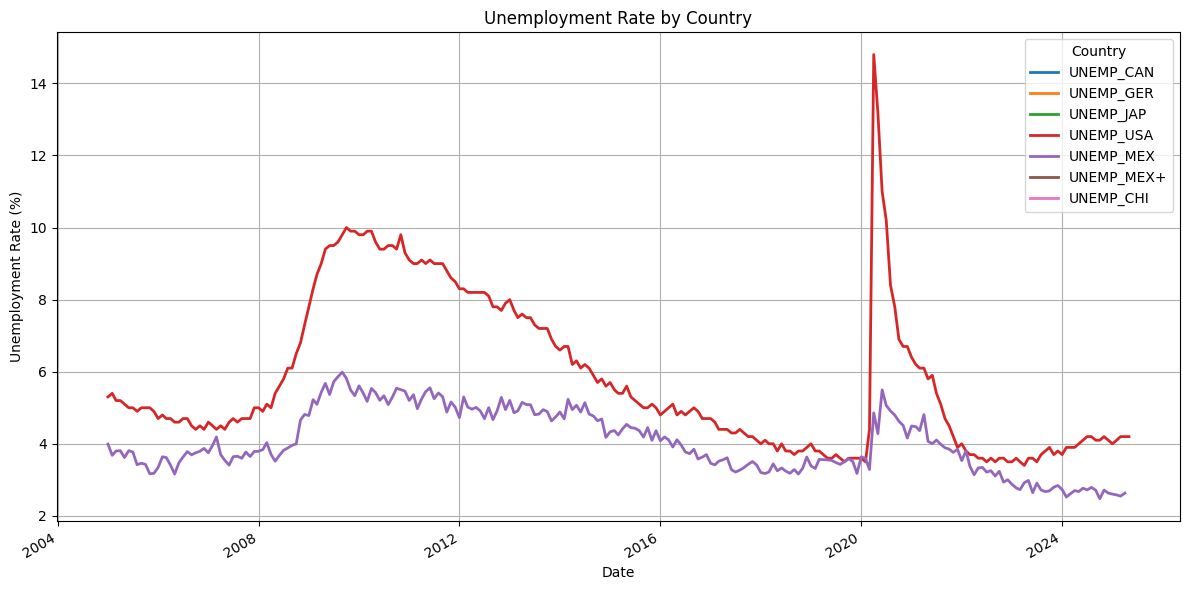

In [985]:
# Keep only unemployment columns (excluding recession flags)
unemp_only = aligned_unemp_df.filter(like="UNEMP")

# Plot all lines
unemp_only.plot(figsize=(12, 6), linewidth=2)
plt.title("Unemployment Rate by Country")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Date")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/unemp_plot.png", dpi=300)
plt.show()

### GDP

In [986]:
gdp_cols = [col for col in df.columns if col.startswith("GDP_")]
gdp_summary = df[gdp_cols].describe().T
display(gdp_summary.round(2))

,count,mean,std,min,25%,50%,75%,max
GDP_CAN,1925.0,487918.68,97331.33,90980.80,457455.80,503123.50,552844.00,613548.00
GDP_GER,1805.0,700.29,56.04,514.52,658.19,697.36,758.46,770.58
GDP_JAP,440.0,530806.90,20147.37,446532.70,517963.00,529243.20,549481.25,557509.70
GDP_USA,1981.0,17537.56,4553.32,2172.43,16502.75,17860.45,20431.64,23542.35
GDP_MEX,1797.0,5504.35,557.95,3306.50,5059.04,5538.84,5980.91,6392.28
GDP_CHI,452.0,9582.54,4709.29,109.12,6241.30,9619.60,13493.44,17175.67


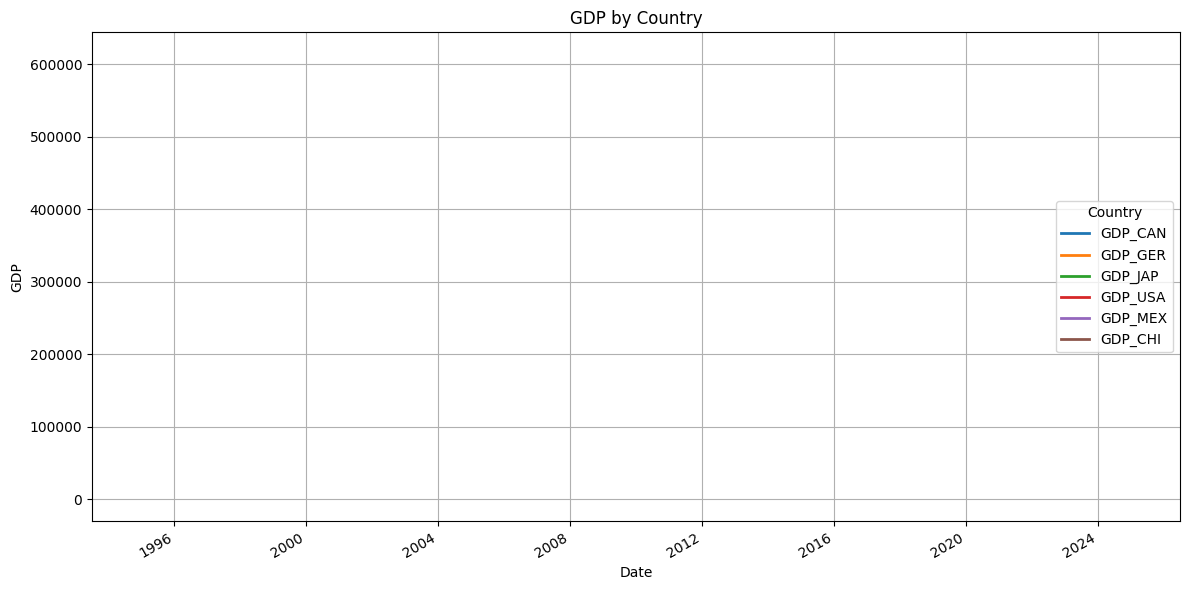

In [987]:
gdp_only = aligned_gdp_df.filter(like="GDP")

# Plot all lines
gdp_only.plot(figsize=(12, 6), linewidth=2)
plt.title("GDP by Country")
plt.ylabel("GDP")
plt.xlabel("Date")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/gdp_plot.png", dpi=300)
plt.show()

### GDP per Capita

In [988]:
gdpc_cols = [col for col in df.columns if col.startswith("GDPC")]
gdpc_summary = df[gdpc_cols].describe().T
display(gdpc_summary.round(2))

,count,mean,std,min,25%,50%,75%,max
GDPC_CAN,194.0,37051.76,6704.63,14733.00,39161.00,39951.00,40526.00,40973.00
GDPC_GER,194.0,34352.46,6835.63,12352.00,35431.00,36785.00,38057.00,39186.00
GDPC_JAP,194.0,31461.87,6936.84,6109.00,33144.00,34294.00,34634.00,35392.00
GDPC_USA,1981.0,55698.53,10850.31,15032.00,54341.00,56272.00,61906.00,69006.00
GDPC_MEX,452.0,9563.33,965.11,4145.79,9491.52,9813.83,10021.24,10296.87
GDPC_CHI,452.0,6583.27,3900.36,70.91,3468.33,7020.39,9905.41,12662.58


### Inflation

In [989]:
inf_cols = [col for col in df.columns if col.startswith("INF")]
inf_summary = df[inf_cols].describe().T
display(inf_summary.round(2))

,count,mean,std,min,25%,50%,75%,max
INF_CAN,474.0,2.39,1.73,0.17,1.52,2.00,2.38,12.47
INF_GER,474.0,2.09,1.69,-0.13,1.10,1.58,2.30,7.03
INF_JAP,474.0,0.98,2.02,-1.35,-0.13,0.34,1.38,23.22
INF_USA,474.0,2.74,1.95,-0.36,1.62,2.44,3.39,13.55
INF_MEX,474.0,6.34,11.19,0.59,3.64,4.11,5.30,131.83
INF_CHI,447.0,2.46,2.43,-1.40,1.52,2.00,2.90,24.26


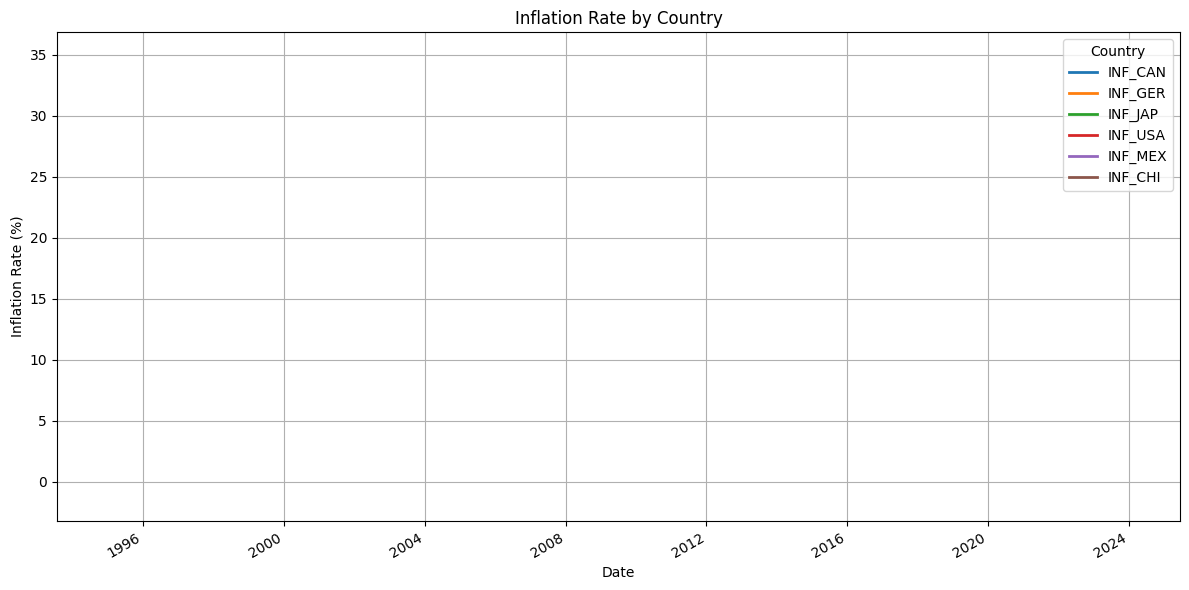

In [990]:
inf_only = aligned_inf_df.filter(like="INF")

# Plot all lines
inf_only.plot(figsize=(12, 6), linewidth=2)
plt.title("Inflation Rate by Country")
plt.ylabel("Inflation Rate (%)")
plt.xlabel("Date")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/inflation_plot.png", dpi=300)
plt.show()

### Imports

In [991]:
im_cols = [col for col in df.columns if col.startswith("IM")]
im_summary = df[im_cols].describe().T
display(im_summary)

,count,mean,std,min,25%,50%,75%,max
IM_CAN,1904.0,1.559872e+05,4.087201e+04,10095.000000,1.416713e+05,1.662568e+05,1.831230e+05,2.010153e+05
IM_GER,1805.0,2.586079e+05,5.137477e+04,92090.923218,2.219605e+05,2.527931e+05,3.044854e+05,3.372098e+05
IM_JAP,1793.0,9.164246e+04,1.315601e+04,45476.200000,8.096380e+04,9.474240e+04,1.017435e+05,1.141083e+05
IM_USA,1981.0,2.486210e+03,8.654188e+02,48.687000,2.289138e+03,2.489615e+03,3.039834e+03,4.031802e+03
IM_MEX,1776.0,2.063858e+06,4.854172e+05,511181.812500,1.682808e+06,2.062671e+06,2.462054e+06,2.942201e+06
IM_CHI,345.0,9.476420e+06,3.976149e+06,188314.103143,6.274536e+06,1.030975e+07,1.247575e+07,1.492873e+07


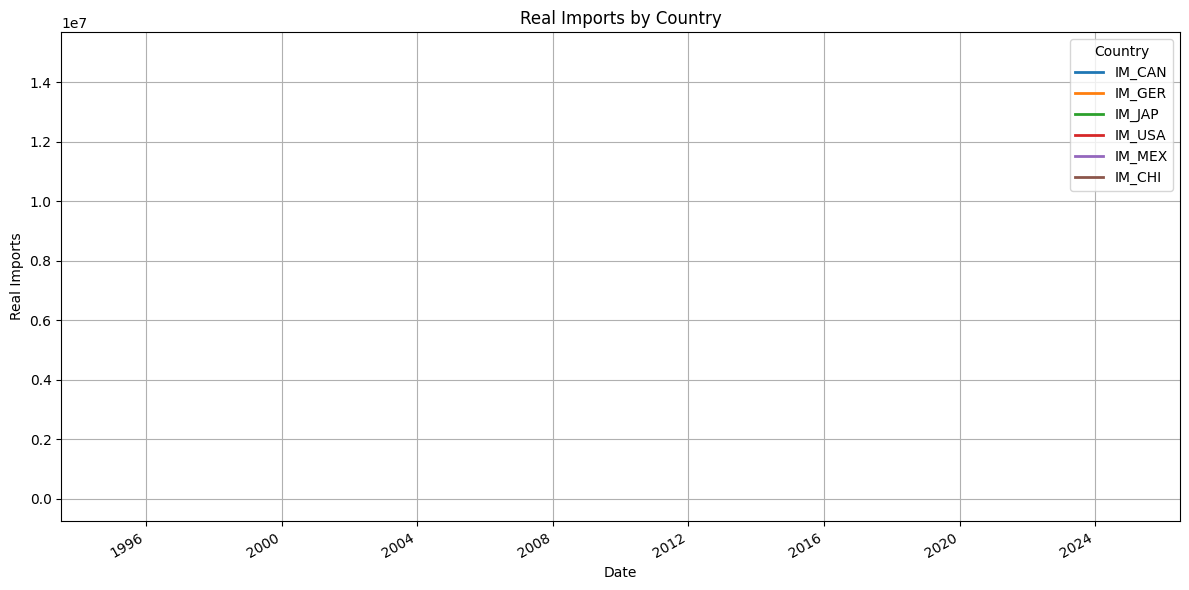

In [992]:
im_only = aligned_im_df.filter(like="IM")

# Plot all lines
im_only.plot(figsize=(12, 6), linewidth=2)
plt.title("Real Imports by Country")
plt.ylabel("Real Imports")
plt.xlabel("Date")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/real_import_plot.png", dpi=300)
plt.show()

### Exports

In [993]:
ex_cols = [col for col in df.columns if col.startswith("EX_")]
ex_summary = df[ex_cols].describe().T
display(ex_summary.round(2))

,count,mean,std,min,25%,50%,75%,max
EX_CAN,1904.0,1.492696e+05,3.514906e+04,1.153680e+04,1.450708e+05,1.525243e+05,1.700270e+05,1.863190e+05
EX_GER,1717.0,3.278010e+11,6.533690e+10,9.760980e+10,2.846202e+11,3.302965e+11,3.900572e+11,4.125892e+11
EX_JAP,440.0,-8.666200e+02,3.888790e+03,-1.745850e+04,-3.939400e+03,-3.430000e+02,2.868100e+03,4.974600e+03
EX_USA,1981.0,1.939710e+03,6.486200e+02,5.766000e+01,1.702680e+03,2.150630e+03,2.371840e+03,2.652770e+03
EX_MEX,5571.0,3.121009e+10,1.155017e+10,9.906710e+08,2.262145e+10,3.139157e+10,3.817967e+10,5.394515e+10
EX_MEX.1,1776.0,1.886643e+06,4.922685e+05,4.447923e+05,1.376869e+06,1.934750e+06,2.361542e+06,2.691016e+06
EX_CHI,345.0,1.148894e+07,4.107382e+06,2.094044e+05,8.760447e+06,1.232434e+07,1.471040e+07,1.689300e+07


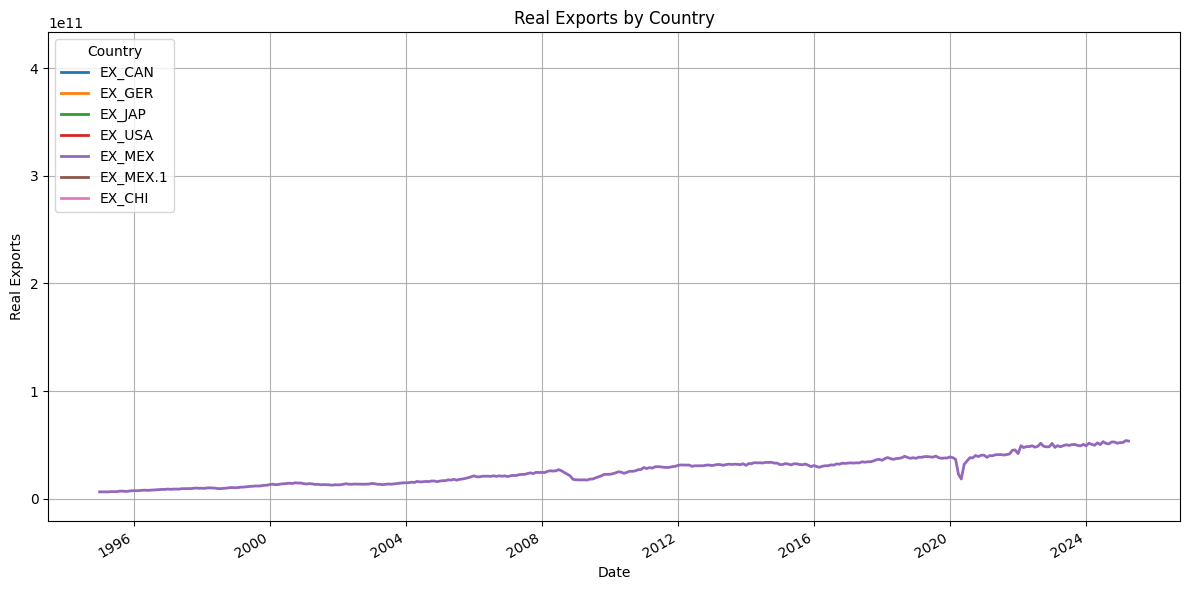

In [994]:
ex_only = aligned_ex_df.filter(like="EX_")

# Plot all lines
ex_only.plot(figsize=(12, 6), linewidth=2)
plt.title("Real Exports by Country")
plt.ylabel("Real Exports")
plt.xlabel("Date")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/real_export_plot.png", dpi=300)
plt.show()

### Industrial Production

In [995]:
ip_cols = [col for col in df.columns if col.startswith("IP")]
ip_summary = df[ip_cols].describe().T
display(ip_summary.round(2))

,count,mean,std,min,25%,50%,75%,max
IP_CAN,5505.0,95.60,14.55,21.99,94.24,99.14,103.31,109.17
IP_GER,454.0,92.54,13.85,24.04,91.81,97.74,99.18,105.03
IP_JAP,457.0,97.69,17.64,6.34,95.84,100.43,103.98,116.95
IP_USA,6303.0,88.14,26.59,3.68,92.85,98.82,101.79,104.15
IP_MEX,5194.0,93.90,9.57,46.73,91.12,95.62,99.97,107.48
IP_CHI,4625.0,109.79,5.08,86.50,106.00,108.90,114.10,123.20


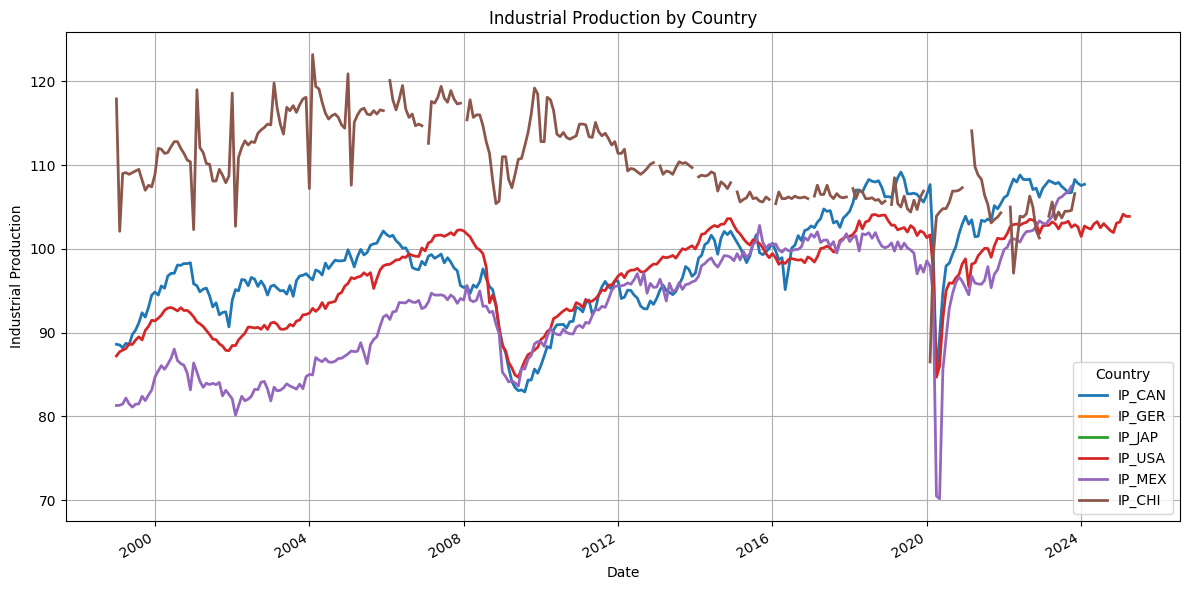

In [996]:
ip_only = aligned_ip_df.filter(like="IP")

# Plot all lines
ip_only.plot(figsize=(12, 6), linewidth=2)
plt.title("Industrial Production by Country")
plt.ylabel("Industrial Production")
plt.xlabel("Date")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/industrial_production_plot.png", dpi=300)
plt.show()

### Yield Spread

In [997]:
ys_cols = [col for col in df.columns if col.startswith("YS")]
ys_summary = df[ys_cols].describe().T
display(ys_summary.round(2))

,count,mean,std,min,25%,50%,75%,max
YS_USA,5635.0,0.98,0.95,-2.14,0.19,0.95,1.69,2.83
YS_CAN,5190.0,0.63,0.73,-1.20,0.18,0.64,1.09,2.26
YS_MEX,3740.0,0.82,1.28,-2.88,-0.03,0.71,1.89,3.02
YS_JAP,5447.0,0.60,0.40,-0.57,0.22,0.56,0.89,4.32
YS_CHI,2188.0,0.62,0.43,-0.13,0.34,0.49,0.80,1.84
YS_GER,5306.0,0.96,0.77,-0.64,0.37,0.86,1.62,2.70


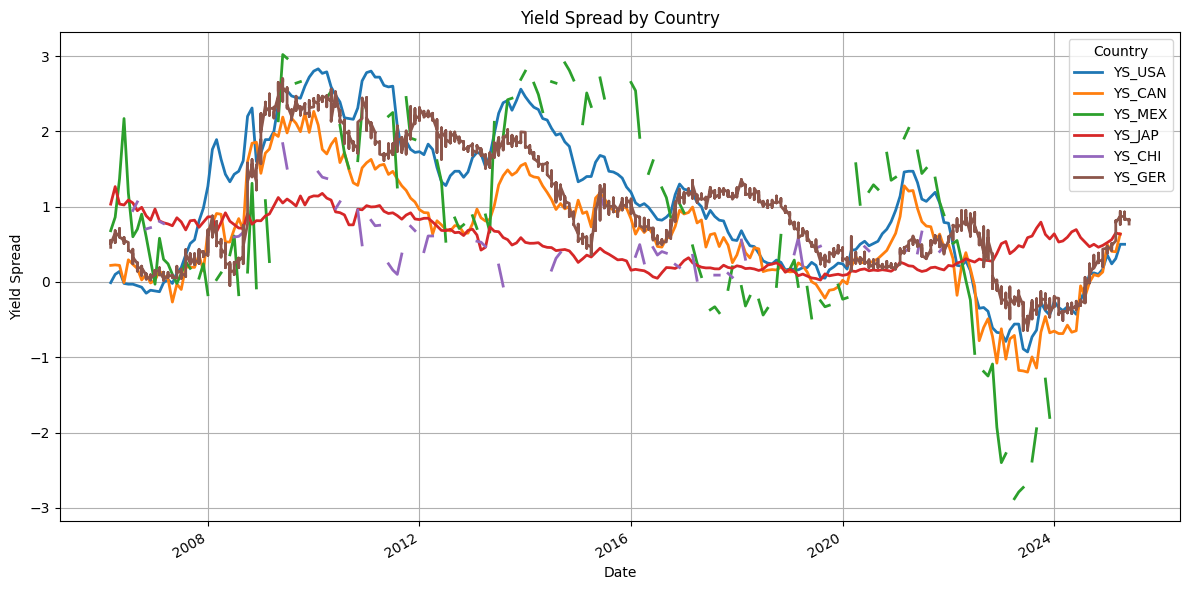

In [998]:
ys_only = aligned_ys_df.filter(like="YS")

# Plot all lines
ys_only.plot(figsize=(12, 6), linewidth=2)
plt.title("Yield Spread by Country")
plt.ylabel("Yield Spread")
plt.xlabel("Date")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/yield_spread_plot.png", dpi=300)
plt.show()

### CCI

In [999]:
cci_cols = [col for col in df.columns if col.startswith("CCI")]
cci_summary = df[cci_cols].describe().T
display(cci_summary.round(2))

,count,mean,std,min,25%,50%,75%,max
CCI_CAN,3707.0,99.93,1.12,96.69,99.26,99.86,100.99,103.01
CCI_USA,5687.0,80.59,13.06,50.00,70.60,81.20,92.10,112.00
CCI_CHI,5095.0,99.54,2.81,93.01,97.89,99.41,100.98,104.63
CCI_GER,5318.0,100.23,1.36,95.89,99.39,100.57,101.34,103.75
CCI_JAP,5207.0,99.52,1.47,95.46,98.67,99.71,100.53,102.44
CCI_MEX,4979.0,99.82,2.80,93.75,97.81,99.62,102.38,105.39


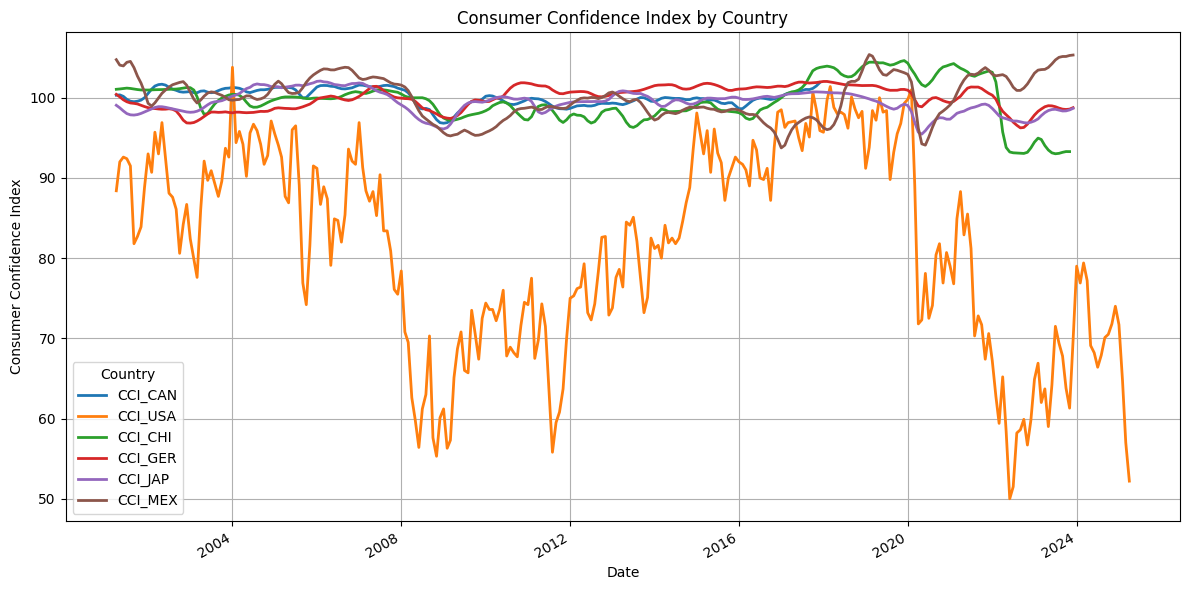

In [1000]:
cci_only = aligned_cci_df.filter(like="CCI")

# Plot all lines
cci_only.plot(figsize=(12, 6), linewidth=2)
plt.title("Consumer Confidence Index by Country")
plt.ylabel("Consumer Confidence Index")
plt.xlabel("Date")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/consumer_confidence_index_plot.png", dpi=300)
plt.show()

In [1001]:
exr_cols = [col for col in df.columns if col.startswith("EXR_")]
exr_summary = df[exr_cols].describe().T
display(exr_summary.round(2))

,count,mean,std,min,25%,50%,75%,max
EXR_CAN,5710.0,1.20,0.14,0.96,1.06,1.24,1.32,1.60
EXR_GER,474.0,0.98,0.58,0.68,0.75,0.85,0.90,4.20
EXR_JAP,5710.0,115.68,32.89,76.64,101.78,110.03,119.51,358.02
EXR_MEX,183.0,8.77,4.88,0.01,7.01,10.90,11.13,13.51
EXR_CHI,5474.0,6.58,1.28,1.46,6.33,6.73,7.05,8.71


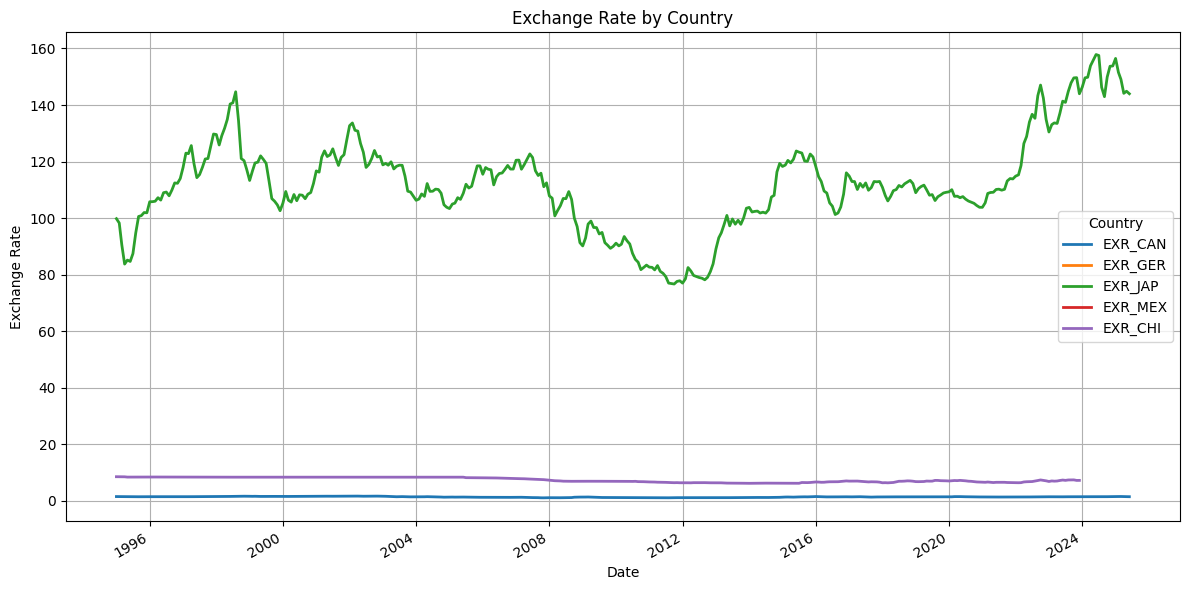

In [1002]:
exr_only = aligned_exr_df.filter(like="EXR_")

# Plot all lines
exr_only.plot(figsize=(12, 6), linewidth=2)
plt.title("Exchange Rate by Country")
plt.ylabel("Exchange Rate")
plt.xlabel("Date")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/consumer_confidence_index_plot.png", dpi=300)
plt.show()

### EPU

In [1003]:
epu_cols = [col for col in df.columns if col.startswith("EPU")]
epu_summary = df[epu_cols].describe().T
display(epu_summary.round(2))

,count,mean,std,min,25%,50%,75%,max
EPU_CAN,5532.0,229.51,193.75,28.54,118.83,199.52,283.98,1635.40
EPU_GER,5436.0,252.77,237.89,28.43,111.59,168.61,278.87,1502.19
EPU_JAP,3177.0,102.68,35.71,29.92,74.16,98.58,126.78,204.73
EPU_USA,5532.0,124.22,79.31,38.21,74.71,103.79,140.28,560.88
EPU_MEX,1961.0,0.28,0.20,0.00,0.14,0.23,0.41,1.06
EPU_CHI,3862.0,194.19,161.02,9.07,84.23,136.72,260.26,935.31


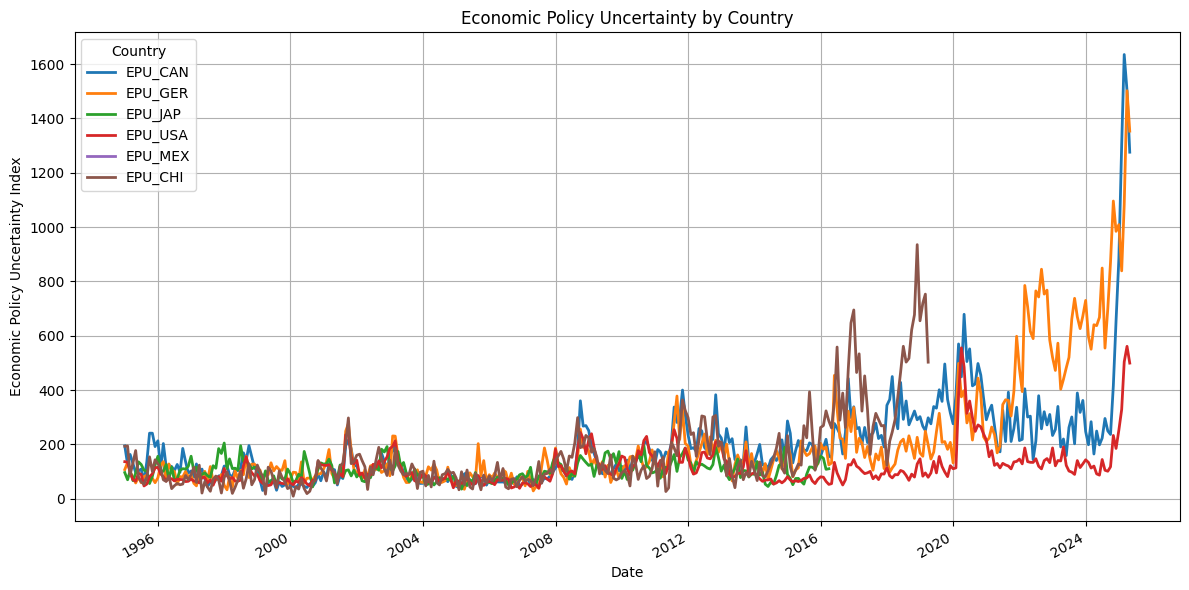

In [1004]:
epu_only = aligned_epu_df.filter(like="EPU")

# Plot all lines
epu_only.plot(figsize=(12, 6), linewidth=2)
plt.title("Economic Policy Uncertainty by Country")
plt.ylabel("Economic Policy Uncertainty Index")
plt.xlabel("Date")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/economic_uncertainty_plot.png", dpi=300)
plt.show()

### Recess Indicator

In [1005]:
recess_cols = [col for col in df.columns if col.startswith("RECESS")]
recess_summary = df[recess_cols].describe().T
display(recess_summary.round(2))

,count,mean,std,min,25%,50%,75%,max
RECESS_CAN,5156.0,0.33,0.47,0.0,0.0,0.0,1.0,1.0
RECESS_GER,5156.0,0.45,0.50,0.0,0.0,0.0,1.0,1.0
RECESS_JAP,5134.0,0.39,0.49,0.0,0.0,0.0,1.0,1.0
RECESS_USA,5312.0,0.35,0.48,0.0,0.0,0.0,1.0,1.0
RECESS_MEX,5134.0,0.25,0.43,0.0,0.0,0.0,0.0,1.0
RECESS_CHI,4941.0,0.66,0.47,0.0,0.0,1.0,1.0,1.0


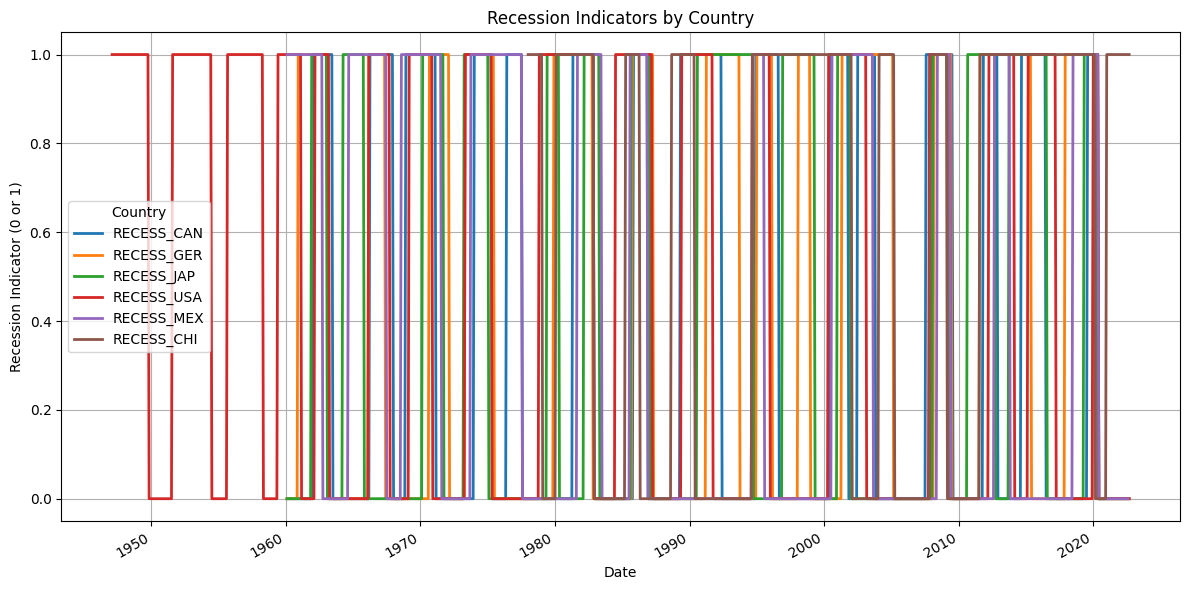

In [1006]:
recess_only = df[recess_cols]

# Plot all lines
recess_only.plot(figsize=(12, 6), linewidth=2)
plt.title("Recession Indicators by Country")
plt.ylabel("Recession Indicator (0 or 1)")
plt.xlabel("Date")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/recession_indicator_plot.png", dpi=300)
plt.show()

In [1007]:
with pd.ExcelWriter("../data/summary_tables/selected_summaries.xlsx") as writer:
    unemp_summary.round(2).to_excel(writer, sheet_name="Unemployment")
    gdp_summary.round(2).to_excel(writer, sheet_name="GDP")
    gdpc_summary.round(2).to_excel(writer, sheet_name="GDPC")
    inf_summary.round(2).to_excel(writer, sheet_name="Inflation")
    im_summary.round(2).to_excel(writer, sheet_name="Imports")
    ex_summary.round(2).to_excel(writer, sheet_name="Exports")
    ip_summary.round(2).to_excel(writer, sheet_name="Industrial Prod")
    ys_summary.round(2).to_excel(writer, sheet_name="Yield Spread")
    cci_summary.round(2).to_excel(writer, sheet_name="Consumer Conf")
    epu_summary.round(2).to_excel(writer, sheet_name="EPU")
    recess_summary.round(2).to_excel(writer, sheet_name="Recession Indicator")

In [1008]:
panel_df = df.reset_index().melt(id_vars="date", var_name="variable", value_name="value")
panel_df["country"] = panel_df["variable"].str.extract(r'_([A-Z]{3})$')
panel_df = panel_df[["date", "country", "variable", "value"]]

# Ensure that the timestamp is YYYY-MM
panel_df["date"] = pd.to_datetime(panel_df["date"]).dt.strftime("%Y-%m")

# Save each country to its own sheet
with pd.ExcelWriter("../data/summary_tables/panel_dataset_by_country.xlsx") as writer:
    for country in sorted(panel_df["country"].dropna().unique()):
        country_df = panel_df[panel_df["country"] == country]
        country_df.to_excel(writer, sheet_name=country, index=False)

In [1009]:
with pd.ExcelWriter("../data/summary_tables/country_aligned_timeseries.xlsx") as writer:
    countries = sorted(set(col.split("_")[-1] for col in df.columns if "_" in col))

    for country in countries:
        country_cols = [col for col in df.columns if col.endswith("_" + country)]
        if not country_cols:
            continue

        country_df = df[country_cols].copy()
        valid_starts = [country_df[col].first_valid_index() for col in country_df.columns]
        latest_start = max(d for d in valid_starts if d is not None)
        trimmed_df = country_df[country_df.index >= latest_start]

        # Format the index as YYYY-MM
        trimmed_df.index = trimmed_df.index.strftime("%Y-%m")

        trimmed_df.to_excel(writer, sheet_name=country)